# Exploratory Data Analysis




**Notebook Structure** <br>


1.   Read File
2.   Data Exploration
> 2.1 Identify Missing Values <br>
  2.2 Categorical Data Exploration <br>
  2.3 Continuous Data Exploration <br>
  2.4 Correlation Exploration







# Prepare Environment

In [ ]:
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np 

# 1. Read File

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**File Directory**

<font color=blue>MyDrive/</font> <br>
|__ <font color=blue>Colab Notebook/</font> <br>

> |__ Exploratory_data_analysis.ipynb <br>
  |__ <font color=blue>Fast_Furious_Insured/</font> <br>

> >|__ sample_submission.csv <br>
   |__ test.csv <br>
   |__ train.csv <br>
   |__ <font color=blue>testImages/</font> <br>
   |__ <font color=blue>trainImages/</font>

*Note: Folder in blue*

In [ ]:
from pathlib import Path

# Get folder path
data_path = Path("./drive/MyDrive/Colab Notebooks/Fast_Furious_Insured")

In [ ]:
# Read csv file into DataFrame
train_df = pd.read_csv(data_path/"train.csv")

# 2. Data Exploration

In [ ]:
# Print the shape to know number of rows and columns in table
print(train_df.shape)

# Display the first 5 rows
train_df.head(5)

(1399, 8)


,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


## 2.1 Identify Missing Values


In [ ]:
# Checking for missing values
train_df.isnull().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [ ]:
# Display rows with missing values
train_df[train_df.isnull().any(axis=1)]

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
8,img_7767281.jpg,DA,NaN,NaN,2028-06-07,NaN,1,513.0
13,img_7767681.jpg,DA,NaN,NaN,2026-05-28,NaN,1,7983.0
14,img_4536138.jpg,C,NaN,NaN,2022-01-12,NaN,1,6532.0
21,img_4636799.jpg,AC,NaN,NaN,2027-04-13,NaN,1,470.0
23,img_7768147.jpg,O,NaN,NaN,2024-08-21,NaN,1,7870.0
...,...,...,...,...,...,...,...,...
1264,img_4635854.jpg,O,NaN,NaN,2028-02-17,NaN,1,395.0
1265,img_4514917.jpg,DA,NaN,NaN,2023-05-02,NaN,1,5922.0
1321,img_7765224.jpg,A,NaN,NaN,2025-11-21,NaN,1,2698.0
1372,img_4636777.jpg,A,NaN,NaN,2028-06-01,NaN,1,5752.0


## 2.2 Categorical Data Exploration 

In [ ]:
# Set style - colormap
my_cmap = plt.cm.get_cmap('tab10')

In [ ]:
# List out unique values for categorical attributes
print("Insurance company:", train_df['Insurance_company'].unique())
print("Condition:", train_df['Condition'].unique())

Insurance company: ['BQ' 'A' 'AC' 'BC' 'DA' 'BB' 'C' 'O' 'B' 'AA' 'RE']
Condition: [0 1]


In [ ]:
# Define funtion to plot bar chart
def plot_bar(name, var_data):
    # Plot bar for categorical value by count
    count = var_data.value_counts().plot.bar(color=my_cmap.colors)

    # Customize the chart
    plt.title('Bar Chart for ' + name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)

    # Label values on bar chart
    for p in count.patches:
        count.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 5), 
                       textcoords = 'offset points')

    # Save as png
    #plt.savefig(name + '.png', bbox_inches='tight')

    # Display the plot
    plt.show()

In [ ]:
# Get the variable to examine
name = "Insurance Company"
var_data = train_df["Insurance_company"]

# Call the function to plot bar chart
plot_bar(name, var_data)

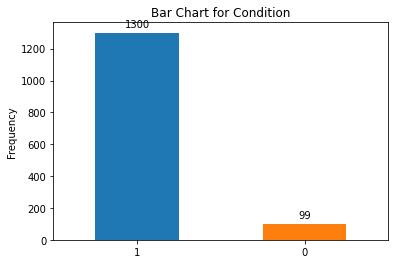

In [ ]:
# Get the variable to examine
name = "Condition"
var_data = train_df["Condition"]

# Call the function to plot bar chart
plot_bar(name, var_data)

## 2.3 Continuous Data Exploration 

In [ ]:
# View the distribution of continuous attributes
train_df.describe()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
count,1310.000000,1310.000000,1310.000000,1399.000000,1388.000000
mean,37454.274809,936.356870,11242.925160,0.929235,4117.144092
std,8921.428143,223.035704,7163.735952,0.256523,3151.516223
min,11100.000000,277.500000,2853.000000,0.000000,-999.000000
25%,29800.000000,745.000000,7603.000000,1.000000,1641.750000
50%,37300.000000,932.500000,9678.000000,1.000000,4070.000000
75%,45175.000000,1129.375000,11703.000000,1.000000,6039.500000
max,53500.000000,1337.500000,46495.680000,1.000000,59844.000000


In [ ]:
# Define function to plot histogram and boxplot
def show_distribution(name, var_data):

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the figure
    fig.suptitle(name + ' Data Distribution')
    
    # Save as png
    #fig.savefig(name + '.png', bbox_inches='tight')

    # Show the figure
    fig.show()


In [ ]:
# Define function for different missing value imputation methods
def impute_missing(df, option):
  # Option 1: Fill missing values with values from next row, fill with 0 if there are still missing values
  if option == 1:
    df = df.fillna(method='bfill', axis=0).fillna(0)

  # Option 2: Fill missing values with mean
  elif option == 2:
    df = df.fillna(df.mean())

  # Option 3: Fill missing values with 0
  elif option == 3:
    df = df.fillna(0)

  # Option 4: Remove rows with missing values
  elif option == 4:
    df = df.dropna(axis=0, how='any')

  return df

In [ ]:
# Impute missing value to display proper boxplot
# Current chosen imputation method: remove missing value
imputed_df = impute_missing(train_df, 4)

Minimum:11100.00
Mean:37472.33
Median:37300.00
Mode:30800.00
Maximum:53500.00



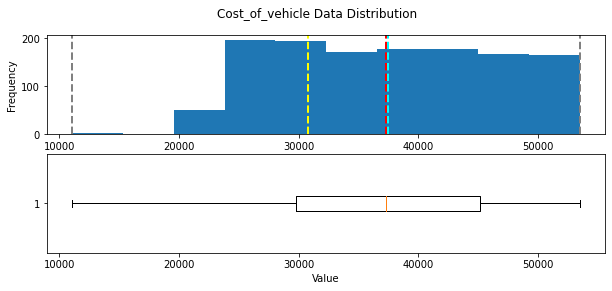

In [ ]:
# Get the variable to examine
col = imputed_df['Cost_of_vehicle']

# Call the function
show_distribution('Cost_of_vehicle', col)

Minimum:277.50
Mean:936.81
Median:932.50
Mode:770.00
Maximum:1337.50



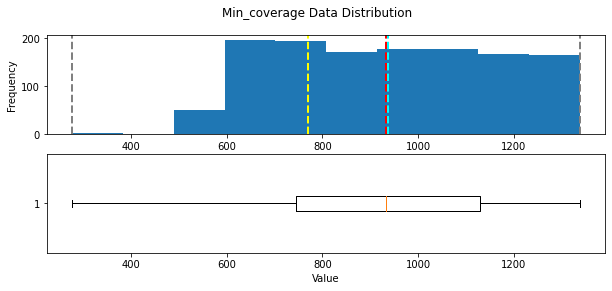

In [ ]:
# Get the variable to examine
col = imputed_df['Min_coverage']

# Call the function
show_distribution('Min_coverage', col)

Minimum:2853.00
Mean:11259.90
Median:9678.00
Mode:7778.00
Maximum:46495.68



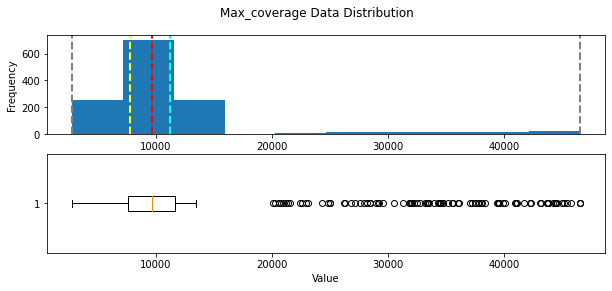

In [ ]:
# Get the variable to examine
col = imputed_df['Max_coverage']

# Call the function
show_distribution('Max_coverage', col)

Minimum:0.00
Mean:4105.47
Median:4048.00
Mode:0.00
Maximum:59844.00



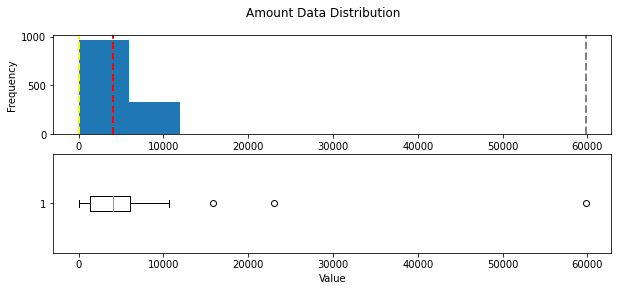

In [ ]:
# Get the variable to examine
col = imputed_df['Amount']

# Call the function
show_distribution('Amount', col)

## 2.4 Correlation Exploration

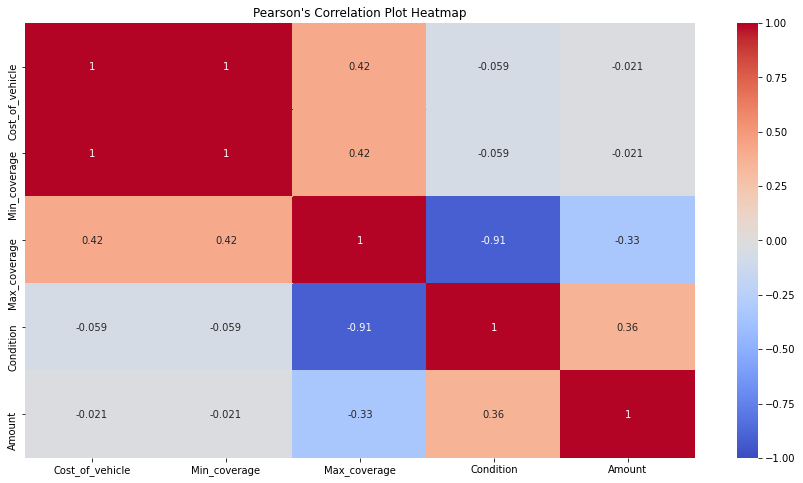

In [ ]:
# Correlation heatmap
corr = train_df.corr(method='pearson')

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
train_df.columns

plt.title("Pearson's Correlation Plot Heatmap")

# Save as png
#plt.savefig('Correlation_heatmap.png', bbox_inches='tight')

plt.show(sns.heatmap)